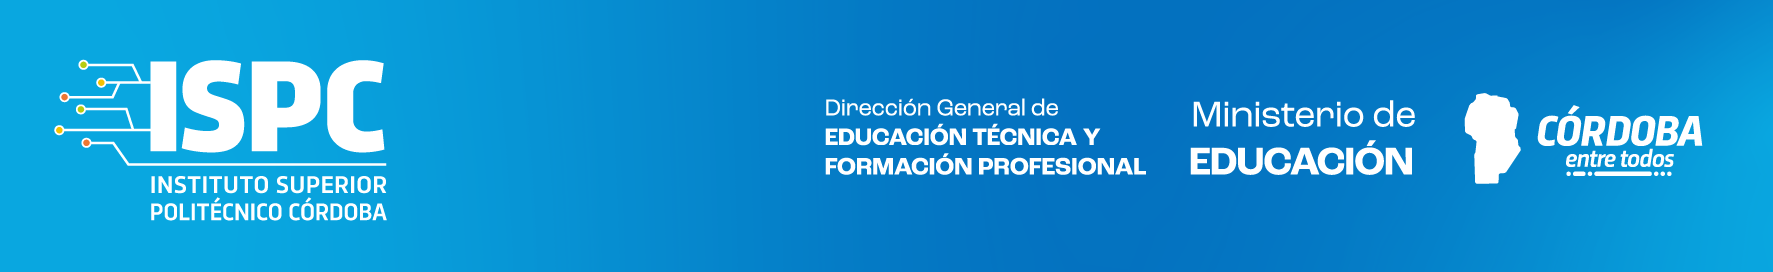

<br>
<br>

# **Exploración y Análisis de Datos (EDA)**


<br>
<br>
<br>
<br>

## Presentación



### Docente:

-  Charletti, Carlos



### Alumnos integrantes:

- Galeano, Agustín
- López, Erick
- Nüesch, Christian
- Zurita Rojo, Débora


### Objetivo:

Realizar una exploración y análisis exhaustivo del conjunto de datos obtenido, utilizando técnicas de EDA para comprender la estructura de los datos, identificar patrones y preparar los datos para el modelado.


<br>
<br>
<br>
<br>

## Exploración Inicial de Datos



_Este paso permite obtener una visión general del dataset, como conocer cuántas observaciones y variables hay, el tipo de datos (numéricos, categóricos), valores faltantes, inconsistencias, etc._

El dataset con el que se va a trabajar fue recopilado a principios de 2023, e incluye información detallada sobre ventas de automóviles, como marca, modelo, tipo de chasis, precio de venta y la moneda en la que se cotiza (pesos o dólares).



<br>
<br>

### Carga del Dataset

Lo primero que hacemos es cargar el conjunto de datos en el entorno de trabajo. Al mismo tiempo, nos aseguramos de que los datos se hayan cargado correctamente y se encuentren en el formato adecuado.

Para cargar el dataset se utiliza principalmente la librería "Pandas" de Python, pero como también se utilizan o se van a utilizar otras librerías, todas estas se las carga desde el principio por una cuestión de ordenamiento y de buenas prácticas.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Esto configura pandas para que muestre los números flotantes con dos decimales y así evitar la notación científica.

<br>
<br>

Luego leemos los datos desde el archivo que los contiene, en este caso un archivo de valores separados por comas (csv):


```
autos_argentina.csv
```



In [ ]:
data = pd.read_csv ('autos_argentina.csv')

In [ ]:
print(data)

<br>
<br>

### Revisión General

_En esta parte, procedemos a realizar una revisión general del conjunto de datos para obtener una visión inicial de su estructura. Se incluyen el número de filas y columnas, nombres de columnas, y tipos de datos de cada columna._

Aquí lo que hacemos es imprimir los primeros diez registros del dataset para poder hacernos una idea de qué se trata:

In [ ]:
print(data.head(10))

<br>
<br>

También podemos imprimir las últimas filas del dataset (tanto para ```head``` como para ```tail``` por defecto siempre se imprimen cinco filas):


In [ ]:
data.tail()

<br>
<br>

También vamos a generar una descripción general del dataset:


In [ ]:
data.describe()

,Precio,Año,Puertas,Kilómetros
count,513.00,513.00,513.00,513.00
mean,3954579.08,2829.56,4.48,74497.95
std,2920026.16,12470.07,0.76,46800.19
min,8000.00,1995.00,2.00,500.00
25%,2290000.00,2014.00,4.00,43000.00
50%,3489900.00,2017.00,5.00,65500.00
75%,5200000.00,2019.00,5.00,99100.00
max,14299000.00,202000.00,5.00,335000.00


<br>
<br>

Con el método ```info()``` podemos ver el número de filas y columnas, el tipo de datos de cada columna, el número de valores no nulos de cada columna y el uso de memoria del dataset:


In [ ]:
data.info()

<br>
<br>

Se pueden visualizar diferentes características del dataset:


In [ ]:
# Los nombres de las columnas:
data.columns

Index(['Precio', 'Marca', 'Modelo', 'Año', 'Color', 'Combustible', 'Puertas',
       'Caja', 'Motor', 'Carrocería', 'Kilómetros', 'Moneda'],
      dtype='object')

<br>


In [ ]:
# La cantidad total de celdas o elementos del dataset:
data.size

6156

<br>


In [ ]:
# Ver si faltan datos en alguna fila:

columnas_requeridas = ['Precio', 'Marca', 'Modelo', 'Año', 'Color', 'Combustible', 'Puertas', 'Caja', 'Motor', 'Carrocería', 'Kilómetros', 'Moneda']
filas_con_valores_faltantes = data[data[columnas_requeridas].isna().any(axis=1)]

# Imprimir las filas con valores faltantes:
print(filas_con_valores_faltantes)

<br>


In [ ]:
# Ver si faltan datos en alguna columna:

# En nuestro caso se puede ver que en las columnas 'Color', 'Caja', 'Motor' y
# 'Carrocería' hay datos ausentes.
data.count(axis='index')

,0
Precio,513
Marca,513
Modelo,513
Año,513
Color,502
Combustible,513
Puertas,513
Caja,512
Motor,503
Carrocería,512


<br>


In [ ]:
# Podemos observar qué cantidad hay de cada elemento en cada columna, simplemente
# ajustando o indicando la columna a la que nos referimos
data.value_counts('Marca')

<br>


In [ ]:
# Valores válidos sobre el total

# Como la operación se debe realizar varias veces, empaquetamos todo el código
# en una función, y así lo reutilizamos al código


def ausentes_y_texto(columna):
  columna_analizada = data[columna]
  datos_ausentes = columna_analizada.isna().sum()
  datos_de_texto = columna_analizada.apply(lambda x: isinstance(x, str)).sum()
  print(f'Número de datos ausentes en "{columna}": {datos_ausentes}')
  print(f'Número de datos de texto en "{columna}": {datos_de_texto}')
  print('\n')

ausentes_y_texto('Precio')
ausentes_y_texto('Año')
ausentes_y_texto('Puertas')
ausentes_y_texto('Motor')
ausentes_y_texto('Kilómetros')

Número de datos ausentes en "Precio": 0
Número de datos de texto en "Precio": 0


Número de datos ausentes en "Año": 0
Número de datos de texto en "Año": 0


Número de datos ausentes en "Puertas": 0
Número de datos de texto en "Puertas": 0


Número de datos ausentes en "Motor": 10
Número de datos de texto en "Motor": 503


Número de datos ausentes en "Kilómetros": 0
Número de datos de texto en "Kilómetros": 0




<br>
<br>
<br>
<br>

## Limpieza de Datos



_Una vez que realizada la exploración inicial, se identifican los problemas que podrían requerir limpieza, como valores nulos, duplicados, errores tipográficos y atípicos. Este paso es muy importante porque los datos sucios pueden llevar a resultados incorrectos en los análisis._

<br>

Para ello manipulamos el dataset con el que venimos trabajando con el objetivo de "curarlo" o dejar los datos tratados para poder operar con ellos, por ejemplo generando gráficos para entenderlos de una manera visual, y por tanto más intuitiva. Este tratamiento de los datos siempre se debe realizar, más aun cuando se trabaja con grandes paquetes de datos, los cuales en la mayoría de los casos incluirán inconsistencias.

<br>
<br>

### Tratamiento de Valores Faltantes

Aquí, se identifican los valores faltantes en el conjunto de datos si es que existieran. Aplicamos los métodos adecuados para el tratamiento de estos valores, ya sea mediante imputación, eliminación de filas/columnas o sustitución con valores medianos/modales.


<br>

#### Datos Ausentes

Lo primero que vamos a abordar es el tratamiento de datos ausentes, lo cual se presenta cuando hay celdas vacías. En este caso las soluciones pueden ser de dos tipos:
- rellenar la celda vacía con alguna de las siguientes opciones (entre muchas):
  - usando la media, la mediana o la moda de los valores de esa columna (estas opciones excepto la moda, son válidas si en la columna tratada los valores son de tipo numérico)
- reemplazar directamente valores vacíos:
  - eliminar la fila completa donde se encuentra la celda vacía. Esta solución se utiliza cuando se dispone de grandes volúmenes de datos, por tanto la eliminación de alguna celda vacía no comprometerá la cantidad o la calidad de la información disponible. Es la opción más sencilla y la que utilizamos a lo último, para tener la oportunidad de generar alguna transformación antes

En nuestro caso todas las columnas están completas, excepto:
- `Color` que le faltan once datos: *para no perder muchos datos, se completarán todos los ausentes con el colo 'Blanco'*
- `Caja` que le falta sólo un dato: *aquí reemplazaremos usando la moda*
- `Motor` que le faltan diez datos: *también eliminamos todas las filas*
- `Carrocería` que le falta sólo un dato: *completamos de manera directa*

<br>
<br>

Comenzamos reemplazando el único dato ausente en la columna `Caja` usando la moda:


In [ ]:
# Calculamos la moda de la columna 'Caja'
moda_caja = data['Caja'].mode()[0]  # [0] para obtener el primer valor de la moda
                                    # (puede haber varios)

# Rellenamos los valores faltantes en la columna 'Caja' con la moda
data['Caja'].fillna(moda_caja, inplace=True)

# En la fila 213 en la columna 'Caja' se agrega 'Manual'

<br>
<br>

Luego reemplazamos el dato ausente en `Carrocería` de manera directa usando el método de Pandas `loc`:


In [ ]:
data.loc[280, 'Carrocería'] = 'Hatchback'

# En la fila 280 en la coumna 'Carrería' aparece ahora el tipo 'Hatchback'

<br>
<br>

Ahora completamos todos los ausentes en la columna `Color` con el color `Blanco`, que sería lo más neutro, igual que antes usando el método `.fillna()`:


In [ ]:
data['Color'].fillna('Blanco', inplace=True)

<br>
<br>

Una vez que agregamos algunos datos en celdas vacías, procedemos a eliminar todas las filas que tienen algún valor ausente usando el método de Pandas `.dropna()`. El parámetro `inplace=True` modifica el dataframe original, sin crear una copia.

Faltan algunos datos en la columna `Motor`:


In [ ]:
data.dropna(inplace=True)

<br>
<br>

### Normalización y Transformación

Por último, realizamos las transformaciones necesarias para preparar los datos para el análisis posterior. Esto puede incluir normalización y estandarización.


<br>

#### Datos en Formato Incorrecto

Este quizás es el punto más complicado que tengamos al momento de darle tratamiento al dataset con el que trabajamos, ya que va implicar pensar una estrategia para dejar los datos limpios.

Lo primero que haremos es comprobar el tipo de dato de algunas celdas específicas para averiguar con qué estamos trabajando, usando una combinación de `loc` para acceder al valor de una celda, y `type` para obtener el tipo de dato:


In [ ]:
#type(data.loc[1, 'Motor'])
#type(data.loc[2, 'Motor'])
type(data.loc[10, 'Motor'])
#data['Motor'].dtypes

str

<br>

Haciendo diferentes pruebas vemos que la columna `Motor` es del tipo de dato `object`, que en nuestro caso se utiliza para representar cadenas de texto.

Lo que hacemos entonces es pasar todo directamente a `str` para poder manipular el contenido de las celdas, y luego pasar nuevamente todo a formato de `float` que es el que nos interesa:


In [ ]:
data['Motor'] = data['Motor'].astype(str)

<br>

Lo que vamos a hacer es buscar dentro de la columna `Motor` todas las celdas donde haya un punto, y modificaremos la celda para dejar únicamente el carácter que está antes del punto, el punto, y el carácter siguiente.

Para lograr esto vamos a usar una combinación de expresiones regulares y la función `.apply()` de Pandas:


In [ ]:
# Primero debemos importar el módulo 're' para trabajar con expresiones regulares
import re

# Luego definimos la función que realizará la operación
def extraer_alrededor_punto(texto):
    match = re.search(r"(.)\.(.)", texto)
    if match:
        return match.group(0)  # Obtenemos los tres caracteres (antes, punto, después)
    else:
        return texto  # Devolvemos el texto original si no hay punto

data['Motor'] = data['Motor'].apply(extraer_alrededor_punto)
#print(data['Motor'].to_string())

<br>

Ahora tenemos un problema: en algunas celdas se encuentra un valor de tipo `char` con un dígito, pero sin el `.0`, por lo tanto necesitamos una función que nos "empareje" esos datos.

Para ello volvemos a usar la función `.apply()` y generamos una función que toma un texto como entrada y con `.isdigit()` verifica si el texto contiene solo dígitos.
Si es así, devuelve el texto original con `.0` agregado al final, y si no, devuelve el texto original sin modificaciones.


In [ ]:
# Función para emparejar los datos
def agregar_punto_cero(texto):
    if texto.isdigit():  # Verificamos si el texto contiene solo dígitos
        return texto + '.0'  # Agregamos '.0' si es un dígito aislado
    else:
        return texto  # Devolvemos el texto original si no es un dígito aislado

data['Motor'] = data['Motor'].apply(agregar_punto_cero)
#print(data['Motor'].to_string())
#type(data.loc[13, 'Motor'])

<br>

Pero hasta aquí seguimos teniendo los valores dentro de las celdas de la columna `Motor` como cadenas de caracteres.

Para pasar todo a `float` primero necesitamos extraer sólo los números y luego convertirlos a punto flotante, otra vez utilizando las expresiones regulares. Por último con `astype(float, errors='ignore')` intentamos convertir la columna a `float`. El parámetro `errors='ignore'` hace que se ignoren los valores que no se pueden convertir (como los `None` que pueden haber resultado de la extracción):


In [ ]:
# Extraemos los números (incluyendo el punto decimal)
def extraer_numeros(texto):
    match = re.search(r"\d+\.\d+", texto)  # Buscamos uno o más dígitos, punto, uno o más dígitos
    if match:
        return match.group(0)
    else:
        return None  # Devolvemos None si no hay números

data['Motor'] = data['Motor'].apply(extraer_numeros)

# Convertimos a float (ignorando los valores no numéricos)
data['Motor'] = data['Motor'].astype(float, errors='ignore')

#print(data['Motor'].to_string())

In [ ]:
#type(data.loc[13, 'Motor'])
data['Motor'].dtypes

dtype('float64')

_Como se puede observar, las operaciones han sido exitosas: tenemos la columna Motor sólo con valores numéricos de punto flotante._


<br>

#### Datos Erróneos

Este apartado y el siguiente son los más sencillos de realizar.

Ahora lo que haremos es centrarnos en la columna `Año`, en la cual podemos observar que existen datos (de tipo entero o `int64`) que han sido cargados erróneamente, con ceros de más.


In [ ]:
# Hacemos una comprobación rápida del tipo de datos de la columna 'Año'
#print(data['Año'].to_string())
type(data.loc[13, 'Año'])
#data['Año'].dtypes

numpy.int64

<br>

Lo que haremos es sencillo, comprobaremos si algún valor es mayor que "3000" y procederemos entonces a quitarle ceros hasta dejarlo de cuatro dígitos. Esto lo vamos a lograr tomando un valor de año como entrada y si el año es mayor que 3000, entramos en un bucle `while` que se ejecuta mientras el año sea mayor que 9999 (es decir, tenga más de cuatro dígitos). Dentro del bucle, con `año //= 10` hacemos una división entera entre 10, eliminando el último dígito del año, hasta que finalmente obtenemos el año corregido.:


In [ ]:
def corregir_año(año):
    if año > 3000:
        while año > 9999:
            año //= 10  # Dividimos el año entre 10 (elimina el último dígito)
    return año

data['Año'] = data['Año'].apply(corregir_año)
#print(data['Año'].to_string())

<br>

#### Datos Duplicados

Para el apartado de trabajar con datos duplicados, lo primero que haremos es buscar si hay datos duplicados en el dataset, y lo que más nos interesa, cuántos datos duplicados hay (en el caso de que existan).

Para ello, junto con `.duplicate()` usamos el método `.sum()`. En este caso, a la salida de `.duplicate()` Python cuenta los `True` como unos, y los `False` como ceros, por tanto al sumar los unos obtenemos la cantidad de duplicados que hay.


In [ ]:
print('La cantidad de duplicados es:', data.duplicated().sum())

La cantidad de duplicados es: 3


<br>

Si se desea ver dónde están los duplicados se puede usar el método `.duplicate()` simplemente, pero por defecto sólo se muestran las primeras y últimas cinco filas para evitar una salida excesivamente larga.

Para ver todas las filas,  se puede convertir la salida de `data.duplicate()` (que es una Serie de Pandas) a una cadena:


In [ ]:
print(data.duplicated().to_string())

1      False
2      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
13     False
15     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
25     False
26     False
27     False
28     False
29     False
30     False
32     False
33     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False

<br>

Otra alternativa que existe es cambiar las opciones de Pandas modificándolas para mostrar todas las filas, usando `pd.set_option('display.max_rows', None)`, pero en este caso no nos interesa porque quedaría seteado así Pandas.

Por último, una opción muy interesante es iterar e imprimir, permitiendo tener un control más fino sobre cómo se muestra la salida. Se itera sobre la Serie y se imprime cada fila individualmente:


In [ ]:
for index, value in data.duplicated().items():
    print(f"Fila {index}: {value}")

Fila 1: False
Fila 2: False
Fila 4: False
Fila 5: False
Fila 6: False
Fila 7: False
Fila 8: False
Fila 9: False
Fila 10: False
Fila 11: False
Fila 13: False
Fila 15: False
Fila 17: False
Fila 18: False
Fila 19: False
Fila 20: False
Fila 21: False
Fila 22: False
Fila 23: False
Fila 25: False
Fila 26: False
Fila 27: False
Fila 28: False
Fila 29: False
Fila 30: False
Fila 32: False
Fila 33: False
Fila 35: False
Fila 36: False
Fila 37: False
Fila 38: False
Fila 39: False
Fila 40: False
Fila 41: False
Fila 42: True
Fila 43: False
Fila 44: False
Fila 45: False
Fila 46: False
Fila 47: False
Fila 48: False
Fila 49: False
Fila 50: False
Fila 51: False
Fila 52: False
Fila 53: False
Fila 54: False
Fila 55: False
Fila 58: False
Fila 59: False
Fila 60: False
Fila 61: False
Fila 62: False
Fila 63: False
Fila 64: False
Fila 65: False
Fila 66: False
Fila 67: False
Fila 68: False
Fila 69: False
Fila 70: False
Fila 71: False
Fila 72: False
Fila 73: False
Fila 74: False
Fila 75: False
Fila 76: False
Fila

<br>

Con las filas duplicadas no es mucho lo que se puede hacer, simplemente procedemos a eliminarlas:


In [ ]:
data.drop_duplicates(inplace = True)

<br>


In [ ]:
# Volvemos a imprimir la serie para comprobar que las filas duplicadas fueron eliminadas:
for index, value in data.duplicated().items():
    print(f"Fila {index}: {value}")

Fila 1: False
Fila 2: False
Fila 4: False
Fila 5: False
Fila 6: False
Fila 7: False
Fila 8: False
Fila 9: False
Fila 10: False
Fila 11: False
Fila 13: False
Fila 15: False
Fila 17: False
Fila 18: False
Fila 19: False
Fila 20: False
Fila 21: False
Fila 22: False
Fila 23: False
Fila 25: False
Fila 26: False
Fila 27: False
Fila 28: False
Fila 29: False
Fila 30: False
Fila 32: False
Fila 33: False
Fila 35: False
Fila 36: False
Fila 37: False
Fila 38: False
Fila 39: False
Fila 40: False
Fila 41: False
Fila 43: False
Fila 44: False
Fila 45: False
Fila 46: False
Fila 47: False
Fila 48: False
Fila 49: False
Fila 50: False
Fila 51: False
Fila 52: False
Fila 53: False
Fila 54: False
Fila 55: False
Fila 58: False
Fila 59: False
Fila 60: False
Fila 61: False
Fila 62: False
Fila 63: False
Fila 64: False
Fila 65: False
Fila 66: False
Fila 67: False
Fila 68: False
Fila 69: False
Fila 70: False
Fila 71: False
Fila 72: False
Fila 73: False
Fila 74: False
Fila 75: False
Fila 76: False
Fila 77: False
Fil

_Como se puede observar, las filas 42, 173 y 403 fueron eliminadas exitosamente._

In [ ]:
# Comprobación de cómo quedó el dataset
print(data.to_string())

       Precio          Marca                 Modelo   Año        Color    Combustible  Puertas        Caja  Motor   Carrocería  Kilómetros   Moneda
1    10850000           Jeep                Compass  2022       Blanco          Nafta     5.00  Automática   2.40          SUV         500    pesos
2       35500           Jeep                Compass  2022  Gris oscuro          Nafta     5.00  Automática   2.40          SUV         500  dólares
4     5800000         Toyota                Corolla  2019         Gris          Nafta     4.00      Manual   1.80        Sedán        9000    pesos
5       34500           Jeep                Compass  2022        Negro          Nafta     5.00  Automática   1.30          SUV       10500  dólares
6       25000            Kia                Sorento  2014        Negro         Diésel     5.00  Automática   2.20          SUV      156000  dólares
7       12300  Mercedes-Benz                Clase C  2008     Plateado          Nafta     4.00  Automática   1.8

<br>
<br>
<br>
<br>

## Análisis Univariado



_Después de la limpieza, se puede proceder a analizar una variable a la vez (distribuciones, estadísticas descriptivas, etc.)._


<br>
<br>

### Distribución de Variables

Lo primero que hacemos es realizar un análisis de las variables individuales para entender su distribución. Aquí se pueden utilizar histogramas, boxplots y estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las variables numéricas. Para las variables categóricas, se pueden calcular frecuencias y proporciones, entre otras.


<br>

#### Estadísticas

Empezamos esta parte de análisis propiamente dicho realizando un muestreo de las principales medidas estadísticas del dataset.


In [ ]:
# Menor de los datos:
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].min()

,0
Precio,8000.00
Año,1995.00
Puertas,2.00
Motor,1.00
Kilómetros,500.00


<br>



In [ ]:
# Mayor de los datos:
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].max()

,0
Precio,14299000.00
Año,2022.00
Puertas,5.00
Motor,6.40
Kilómetros,335000.00


<br>



In [ ]:
# Media de los datos:
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].mean()

,0
Precio,3989186.54
Año,2016.27
Puertas,4.47
Motor,1.88
Kilómetros,74732.35


<br>



In [ ]:
# La varianza de los datos:
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].var()

,0
Precio,8369090702650.90
Año,13.73
Puertas,0.57
Motor,0.50
Kilómetros,2190629009.01


<br>



In [ ]:
# La desviación estándar de los datos:
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].std()

,0
Precio,2892938.07
Año,3.71
Puertas,0.76
Motor,0.70
Kilómetros,46804.16


<br>



In [ ]:
# Aquí volvemos a utilizar el método 'describe()' pero indicándole de forma
# específica las columnas sobre las que queremos trabajar, y obtenemos la
# misma información que hasta ahora, pero con el añadido de los cuartiles
data[['Precio', 'Año', 'Puertas', 'Motor', 'Kilómetros']].describe()

,Precio,Año,Puertas,Motor,Kilómetros
count,500.00,500.00,500.00,500.00,500.00
mean,3989186.54,2016.27,4.47,1.88,74732.35
std,2892938.07,3.71,0.76,0.70,46804.16
min,8000.00,1995.00,2.00,1.00,500.00
25%,2380000.00,2014.00,4.00,1.60,43750.00
50%,3489950.00,2017.00,5.00,1.60,65750.00
75%,5259975.00,2019.00,5.00,2.00,99100.00
max,14299000.00,2022.00,5.00,6.40,335000.00


<br>

#### Gráficas

Al igual que se pueden analizar los datos que se tienen por medio de estadísticas principales, también se pueden realizar análisis de manera gráfica. En este apartado se despliegan algunas de esas gráficas.

_La variedad de gráficas y posibilidades es enorme, entonces por una cuestión de tiempos nos tenemos que acotar._


<br>

Empezaremos por lo más sencillo, algunos gráficos de barra tomando como dato las coumnas  `Año`, `Color` y `Carrocería`.


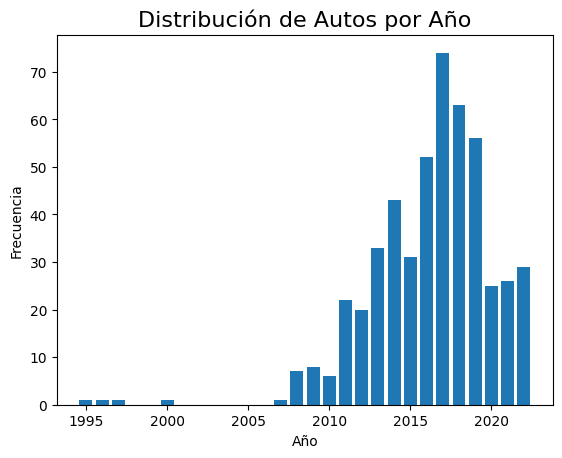

In [ ]:
# Contamos la frecuencia de cada año
conteo_años = data['Año'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_años.index, conteo_años.values)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Año', fontsize=16)

# Mostramos el gráfico
plt.show()

<br>


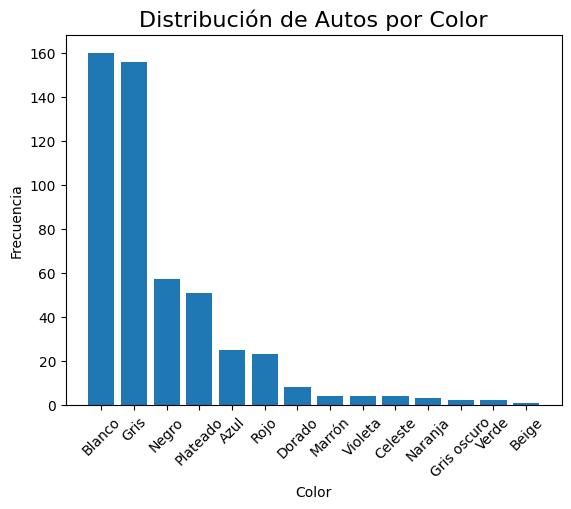

In [ ]:
# Contamos la frecuencia de cada color
conteo_color = data['Color'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_color.index, conteo_color.values)

# Rotamos las etiquetas del eje 'x' para que se lean bien los valores
plt.xticks(rotation=45)  # Aquí se puede ajustar el ángulo de rotación

# Configuramos etiquetas y título
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Color', fontsize=16)

# Mostramos el gráfico
plt.show()

<br>


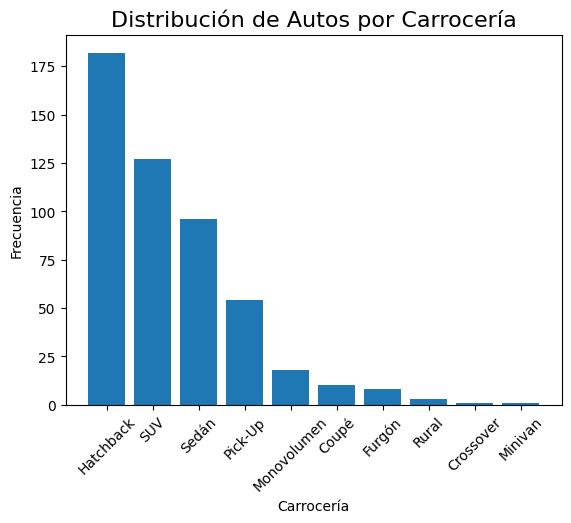

In [ ]:
# Contamos la frecuencia de cada carrocería
conteo_carroceria = data['Carrocería'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_carroceria.index, conteo_carroceria.values)

# Rotamos las etiquetas del eje 'x' para que se lean bien los valores
plt.xticks(rotation=45)  # Aquí se puede ajustar el ángulo de rotación

# Configuramos etiquetas y título
plt.xlabel('Carrocería')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Carrocería', fontsize=16)

# Mostramos el gráfico
plt.show()

<br>
<br>

Para las columnas donde hay almacenados datos categóricos podemos generar gráficos de torta (_pie chart_), ya que representan mejor esta información. Nosotros tenemos datos de este tipo en las columnas `Caja` y `Moneda`.

En el primer gráfico `conteo_caja.values` son los valores que se usarán para el tamaño de cada porción del gráfico; con `labels=conteo_caja.index` generamos las etiquetas para cada porción del gráfico; y con `autopct='%1.1f%%'` damos formato para mostrar los porcentajes dentro de cada porción:


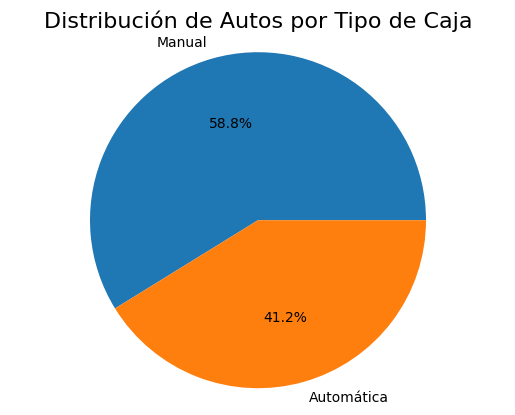

In [ ]:
# Calculamos la frecuencia de cada valor en la columna 'Caja'
conteo_caja = data['Caja'].value_counts()

# Creamos el gráfico de torta
plt.pie(conteo_caja.values, labels=conteo_caja.index, autopct='%1.1f%%')

# Añadimos un título
plt.title('Distribución de Autos por Tipo de Caja', fontsize=16)

# Nos aseguramos que el gráfico sea un círculo
plt.axis('equal')

# Mostramos el gráfico
plt.show()

<br>


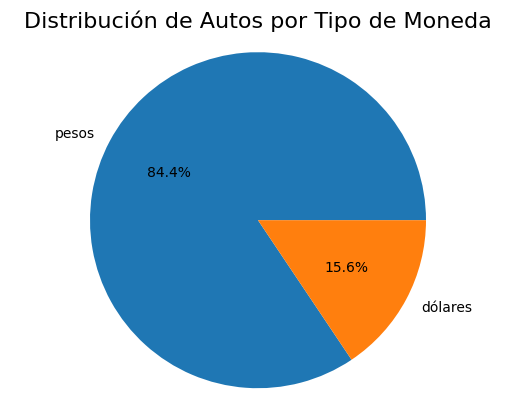

In [ ]:
# Calculamos la frecuencia de cada valor en la columna 'Moneda'
conteo_moneda = data['Moneda'].value_counts()

# Creamos el gráfico de torta
plt.pie(conteo_moneda.values, labels=conteo_moneda.index, autopct='%1.1f%%')

# Añadimos un título
plt.title('Distribución de Autos por Tipo de Moneda', fontsize=16)

# Nos aseguramos que el gráfico sea un círculo
plt.axis('equal')

# Mostramos el gráfico
plt.show()

<br>
<br>

### Identificación de Outliers

Una parte importante de un análisis univariado es detectar posibles outliers en las variables numéricas. Para ello se pueden utilizar técnicas como el análisis de boxplots o el cálculo del z-score.

En nuestro caso los valores atípicos o extremos fueron tratados durante el curado de los datos, pero a efectos de asegurarnos que no existan aun, o simplemente por práctica/aprendizaje, se procederá a realizar un cálculo del z-score de la variable/columna `Año`.

Para ello primero se debe importar el módulo `stats` de la librería `scipy`.


In [ ]:
from scipy import stats

Luego, se calcula el z-score de la columna `Año` usando `stats.zscore()` y se lo guarda en una nueva columna llamada `Año_zscore`:

In [ ]:
data['Año_zscore'] = stats.zscore(data['Año'])

Ahora bien, el z-score ayuda a determinar si existe un valor atípico al indicar cuán lejos se encuentra un punto de datos de la media en términos de desviaciones estándar.

(Generalmente, un valor atípico se define como un punto de datos con un z-score mayor que 3 o menor que -3. Esto se debe a que en una distribución normal, aproximadamente el 99.7% de los datos se encuentran dentro de 3 desviaciones estándar de la media.)

Por lo tanto, si el z-score de un dato en la columna 'Precio' es mayor que 3 o menor que -3, puede ser considerado un valor atípico.

Como sería impráctico revisar todos los datos de una columna individualmente, lo que se hace entonces es buscar dentro de la columna `Año_zscore` si aparece algún valor mayor que 3 o menor que -3, y determinar dónde se encuentra:

In [ ]:
# Se encuentran las filas donde los valores en la columna 'Año' son mayores
# que 3 o menores que -3.
filas = data[(data['Año_zscore'] > 3) | (data['Año_zscore'] < -3)]

# Se imprimen las filas o un mensaje si no se encuentra ninguna.
if filas.empty:
  print("No se encontraron valores mayores que 3 o menores que -3.")
else:
  print("Filas con valores mayores que 3 o menores que -3:")
  print(filas.index)

Filas con valores mayores que 3 o menores que -3:
Index([210, 363, 443, 470], dtype='int64')


_Para el dataset con el que se está trabajando, se puede observar que existen cuatro entradas de datos con un valor de `Año` fuera de las tres desviaciones estándar de la media, pero al constatar estos datos individualmente se observa que no es un problema._

<mark>Consultar sobre este punto al profesor</mark>

<br>
<br>
<br>
<br>

## Análisis Bivariado



_Finalmente, se pueden explorar las relaciones entre variables._


<br>
<br>

### Relaciones entre Variables

En esta última parte de los análisis, procedemos a analizar la relación entre pares de variables para identificar patrones o correlaciones si es que los hubiera. Para ello nos ayudamos de gráficos de dispersión (scatter plots) y mapas de calor de correlación (heatmaps) para evaluar la relación entre variables numéricas.


<br>
<br>

Lo primero que vamos a realizar es un "gráfico de barras agrupadas" para visualizar la relación entre 2 variables categóricas, en este caso `Marca` y `Moneda`, para determinar si existe alguna relación entre ambas categorías.


<Axes: xlabel='Marca'>

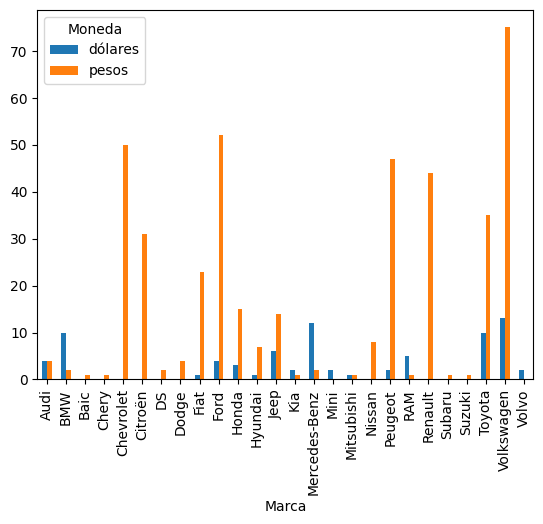

In [ ]:
data.groupby(['Marca', 'Moneda']).size().unstack().plot.bar()

_Se puede observar claramente que la mayoría de las marcas con vehículos a la venta tienen a estos vehículos en moneda local (en pesos), sin embargo hay un par de marcas, principalmente europeas (Audi, BMW y Mercedes-Benz) que tienen una gran presencia de vehículos en venta nominados en dólares._


<br>
<br>

Un gráfico muy utilizado es el gráfico de dispersión o _scatter plot_, el cual es muy útil para visualizar la relación entre dos variables numéricas. Ahora bien, al momento de determinar qué par de columnas es más adecuado para un _scatter plot_ se debe considerar qué pares de variables podrían tener una relación interesante.

En nuestro caso, las columnas `Kilómetros` y `Año` parecen ser una buena opción para un gráfico de dispersión. Esto permitiría visualizar si existe una correlación entre la antigüedad del vehículo (`Año`) y la cantidad de kilómetros recorridos (`Kilómetros`).

Se podría esperar que los vehículos más antiguos tengan más kilómetros, pero también podría haber vehículos más nuevos con alto kilometraje o vehículos antiguos con bajo kilometraje. Un _scatter plot_ ayudaría a identificar estas tendencias y valores atípicos.

Para crear este gráfico simplemente usamos `matplotlib`:


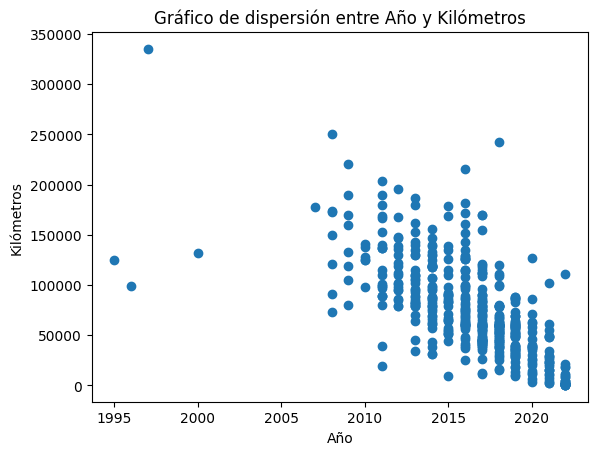

In [ ]:
plt.scatter(data['Año'], data['Kilómetros'])
plt.xlabel('Año')
plt.ylabel('Kilómetros')
plt.title('Gráfico de dispersión entre Año y Kilómetros')
plt.show()

_Se puede observar que hay una clara relación entre la antigüedad de los vehículos puestos a la venta y el kilometraje de cada uno._

_(A menor antigüedad hay una tendencia también a menor cantidad de kilómetros.)_

_Sin embargo, existen algunos valores atípicos de vehículos antiguos que no presentan tanto kilometraje o vehículos más nuevos que presentan un gran kilometraje. Este sería un excelente punto de partida para una investigación de mercado._

<br>
<br>

### Comparaciones Categóricas

Aquí realizamos alguna exploración (gráfica) de cómo las variables categóricas afectan a las variables numéricas (por ejemplo utilizando gráficos de barras y boxplots).


<br>
<br>

El primer gráfico que se despliega es un boxplot, muy frecuente por la cantidad de información que aporta.

En nuestro caso muestra la distribución de una variable numérica para cada categoría de una variable categórica, y nos permite comparar fácilmente las medianas, cuartiles y valores atípicos entre las diferentes categorías.

Para ello primero importamos la librería `Seaborn` (que la también la vamos a utilizar más adelante):


In [ ]:
import seaborn as sns

Luego ya sí procedemos a generar y desplegar el gráfico:


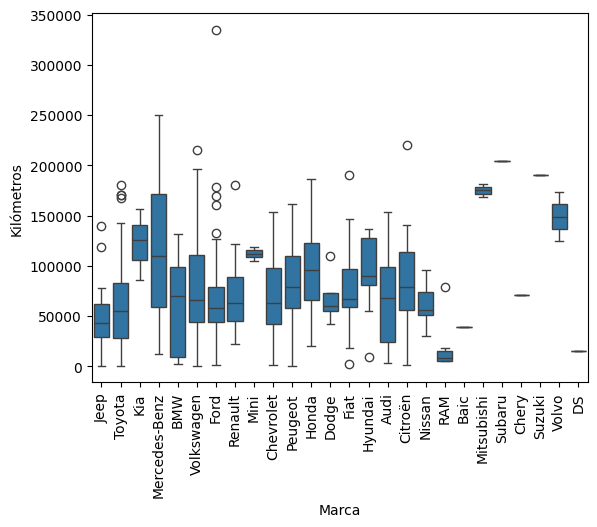

In [ ]:
sns.boxplot(x='Marca', y='Kilómetros', data=data)

# Rotamos los valores del eje x en 90 grados
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.show()

Como se dijo, este gráfico puede aportar información muy interesante. Un análisis del mismo sería el siguiente:

1. Rango de los kilómetros recorridos:
   - Las marcas como **BMW**, **Renault**, **Jeep**, y **Volkswagen** presentan una mayor **variabilidad** en los kilómetros recorridos, ya que sus cajas (el rango intercuartílico) son más amplias, lo que indica que hay más dispersión en los datos.
   - Por otro lado, marcas como **DS**, **Suzuki**, **Volvo**, y **Chery** tienen rangos de kilómetros mucho más pequeños, lo que sugiere que los vehículos de estas marcas tienden a recorrer distancias más similares entre sí.

2. Posición de la mediana:
   - La mediana (línea en el centro de la caja) es más alta en marcas como **BMW** y **Renault**, lo que podría sugerir que los vehículos de estas marcas suelen tener un mayor **kilometraje medio** comparado con otras marcas.
   - Marcas como **DS**, **Chery**, y **Suzuki** tienen una mediana significativamente más baja, lo que indica que en general recorren menos kilómetros.

3. Presencia de outliers:
   - Hay **outliers** (puntos fuera de los "bigotes" del boxplot) en varias marcas como **Volkswagen**, **Mercedes-Benz**, **Renault**, y **Chevrolet**, lo que sugiere que hay algunos vehículos que han recorrido una cantidad inusualmente alta de kilómetros en comparación con el resto de los vehículos de la misma marca.
   - Por otro lado, marcas como **DS**, **Chery**, y **Suzuki** no tienen outliers significativos, lo que indica que sus datos son más consistentes y no tienen vehículos que se desvíen drásticamente en términos de kilómetros recorridos.

4. Marcas con menos kilómetros recorridos:
   - Las marcas como **DS**, **Suzuki**, y **Chery** parecen tener, en general, **vehículos con menos kilómetros recorridos**, ya que tanto la mediana como los bigotes están en la parte inferior del gráfico.
   - Esto podría sugerir que los vehículos de estas marcas son usados con menos frecuencia o que son vehículos más nuevos.

5. Marcas con mayor kilometraje:
   - En comparación, marcas como **BMW**, **Renault**, y **Volkswagen** tienden a tener **mayor kilometraje** en promedio. Esto podría indicar que los autos de estas marcas son más usados o que tienen una mayor vida útil en términos de kilómetros recorridos.

6. Distribución en algunas marcas es más compacta:
   - Las marcas como **Suzuki** y **DS** tienen una distribución de kilómetros más compacta, lo que puede indicar que los autos de estas marcas suelen recorrer distancias más consistentes y cercanas entre sí.

En general, este boxplot sugiere que aunque hay algunas marcas cuyos vehículos recorren más kilómetros que otras, existe una amplia variabilidad entre las marcas en cuanto al uso (kilómetros recorridos). Algunas marcas tienden a tener autos que recorren más kilómetros en promedio (**BMW**, **Renault**, **Volkswagen**), mientras que otras tienden a tener vehículos que recorren menos kilómetros o más consistentemente (**Suzuki**, **DS**, **Chery**).


<br>
<br>

Otro gráfico que se puede utilizar es el de violín (_violin plot_), el cual es similar a los gráficos de caja, pero muestra la densidad de la distribución de la variable numérica.

Es útil para visualizar la forma de la distribución y compararla entre categorías:

<Axes: xlabel='Combustible', ylabel='Año'>

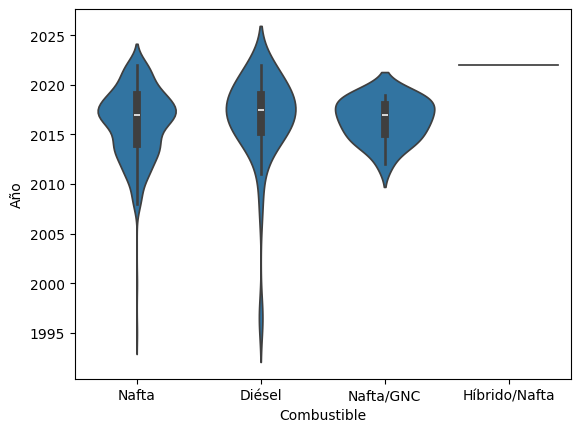

In [ ]:
sns.violinplot(x='Combustible', y='Año', data=data)

<br>
<br>

Por último, y muy utilizados también, están los gráficos de barras (_bar plots_, que ya se usaron antes y son realmente muy versátiles).

Aquí mostramos la media de una variable numérica para cada categoría de una variable categórica, y
comparamos ese valor promedio entre categorías:


<Axes: xlabel='Carrocería'>

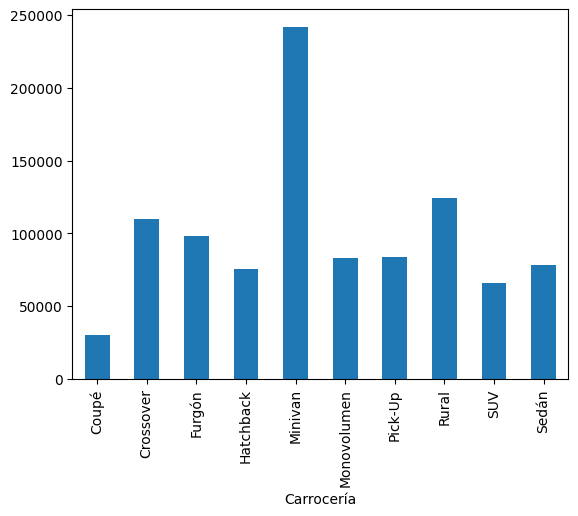

In [ ]:
data.groupby('Carrocería')['Kilómetros'].mean().plot.bar()

De este gráfico de barras también se pueden extraer conclusiones interesantes:

1. La categoría **Minivan** destaca claramente como la que tiene el **kilometraje más alto** en comparación con las demás. Esto podría deberse a que las minivanes son vehículos que se utilizan para transporte familiar o de pasajeros a largas distancias, por lo que es lógico que acumulen más kilómetros.
  
2. Por otro lado, los vehículos tipo **Coupé** tienen el **kilometraje más bajo** de todas las categorías. Esto podría indicar que estos vehículos, que suelen ser deportivos o de dos puertas, se utilizan con menos frecuencia o para trayectos más cortos.

3. Las carrocerías como **Crossover**, **Rural**, y **SUV** presentan un **kilometraje moderado**. Estos vehículos, al ser multifuncionales y con mayor capacidad de carga o espacio, también suelen recorrer distancias considerables, aunque no tanto como las minivanes.

4. En contraste, **Furgón**, **Pick-Up**, y **Hatchback** parecen tener un kilometraje algo menor, posiblemente porque se usan más en contextos urbanos o para tareas específicas que no requieren largos desplazamientos.

5. Se pueden hacer ciertas inferencias sobre el **tipo de uso** de los vehículos según la carrocería. Por ejemplo:
     - **Minivan**: Uso familiar o de transporte de pasajeros a largas distancias.
     - **Coupé**: Vehículos deportivos o para uso recreativo, probablemente no usados con frecuencia.
     - **SUV y Crossover**: Vehículos que, aunque no tienen el kilometraje tan alto como las minivanes, son utilizados para viajes de mediana distancia o en terrenos mixtos (ciudad/campo).
     - **Furgón y Pick-Up**: Podrían usarse para tareas más específicas (transporte de carga, trabajos rurales, etc.), y por eso tienen un kilometraje más moderado.

6. Los vehículos tipo **Sedán** y **Rural** tienen un **kilometraje similar**, lo que podría reflejar que ambos se utilizan tanto para uso diario como para viajes de media distancia, aunque no tan intensivamente como los vehículos tipo Minivan o SUV.

Este gráfico sugiere que el **kilometraje acumulado de los vehículos varía bastante según la carrocería**, lo cual está directamente relacionado con el **uso típico** de cada tipo de vehículo. Las minivanes, por su naturaleza de vehículo familiar o de transporte de pasajeros, tienden a recorrer más kilómetros, mientras que los Coupé, probablemente deportivos o de lujo, recorren menos kilómetros. Los SUVs y Crossover también presentan un uso considerable, probablemente debido a su versatilidad.
